In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import csv
%matplotlib inline

/Users/haley/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Formating dataset

In [54]:
col_name = ['Device ID', 'Time', 'Temperature', 'Humidity']
df = pd.read_table("bt.log2", sep=',', names=col_name,quoting=csv.QUOTE_NONE,)

In [55]:
df.head()

,Device ID,Time,Temperature,Humidity
0,"{""device_id"": ""inTelli-Gee_prototype_v0.1_seri...","""time"": 198","""Temperature"": 21.10","""Humidity"": 73.50}"
1,"{""device_id"": ""inTelli-Gee_prototype_v0.1_seri...","""time"": 199","""Temperature"": 21.10","""Humidity"": 73.50}"
2,"{""device_id"": ""inTelli-Gee_prototype_v0.1_seri...","""time"": 200","""Temperature"": 21.10","""Humidity"": 73.50}"
3,"{""device_id"": ""inTelli-Gee_prototype_v0.1_seri...","""time"": 201","""Temperature"": 21.10","""Humidity"": 73.50}"
4,"{""device_id"": ""inTelli-Gee_prototype_v0.1_seri...","""time"": 202","""Temperature"": 21.10","""Humidity"": 73.60}"


In [56]:
df.shape

(1837, 4)

In [57]:
df.iloc[1836]

Device ID      {"device_id": "inTelli-Gee_prototype_v0.1_seri...
Time                                                "time": 2034
Temperature                                 "Temperature": 20.50
Humidity                                                "Humidit
Name: 1836, dtype: object

In [58]:
# Dropping because humidity is null
df = df.drop([1836])

In [59]:
col_name = ['Device ID', 'Time', 'Temperature', 'Humidity']
for col in col_name:
    df[col] = df[col].apply(lambda x: x.split()[1])

In [60]:
df.head()

,Device ID,Time,Temperature,Humidity
0,"""inTelli-Gee_prototype_v0.1_serial_1""",198,21.10,73.50}
1,"""inTelli-Gee_prototype_v0.1_serial_1""",199,21.10,73.50}
2,"""inTelli-Gee_prototype_v0.1_serial_1""",200,21.10,73.50}
3,"""inTelli-Gee_prototype_v0.1_serial_1""",201,21.10,73.50}
4,"""inTelli-Gee_prototype_v0.1_serial_1""",202,21.10,73.60}


In [61]:
# To get rid of the bracket at the end
df['Humidity'] = df['Humidity'].apply(lambda x: x[:-1]) 

# Converting columns with numerical string into float
for col in col_name[1:]:
    df[col] = df[col].apply(lambda x: float(x))

In [64]:
df.head()

,Device ID,Time,Temperature,Humidity
0,"""inTelli-Gee_prototype_v0.1_serial_1""",198.0,21.1,73.5
1,"""inTelli-Gee_prototype_v0.1_serial_1""",199.0,21.1,73.5
2,"""inTelli-Gee_prototype_v0.1_serial_1""",200.0,21.1,73.5
3,"""inTelli-Gee_prototype_v0.1_serial_1""",201.0,21.1,73.5
4,"""inTelli-Gee_prototype_v0.1_serial_1""",202.0,21.1,73.6


In [87]:
#df.to_csv('streaming_data.csv', index=False) 

## Overview and Visualization of Data in Time Series

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 1835
Data columns (total 4 columns):
Device ID      1836 non-null object
Time           1836 non-null float64
Temperature    1836 non-null float64
Humidity       1836 non-null float64
dtypes: float64(3), object(1)
memory usage: 71.7+ KB


In [66]:
df.describe()

,Time,Temperature,Humidity
count,1836.000000,1836.000000,1836.000000
mean,1115.500000,20.674401,75.143791
std,530.151865,0.140720,0.447944
min,198.000000,20.400000,73.500000
25%,656.750000,20.600000,74.900000
50%,1115.500000,20.600000,75.200000
75%,1574.250000,20.700000,75.500000
max,2033.000000,21.200000,76.000000


In [67]:
# Correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,Temperature,Humidity
Time,1,-0.745409,0.316339
Temperature,-0.745409,1,-0.586001
Humidity,0.316339,-0.586001,1


## Apply Smoothing

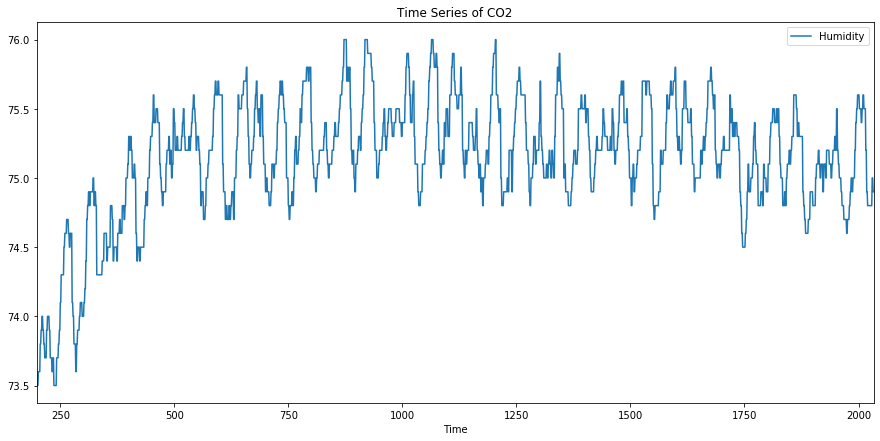

In [79]:
df.plot(x=1,y=3,figsize=(15,7),title='Time Series of CO2')
plt.show()

In [76]:
# Calculating Moving Average
df['Temperature_ma'] = df['Temperature'].rolling(300).mean()
df['Humidity_ma'] = df['Humidity'].rolling(300).mean()

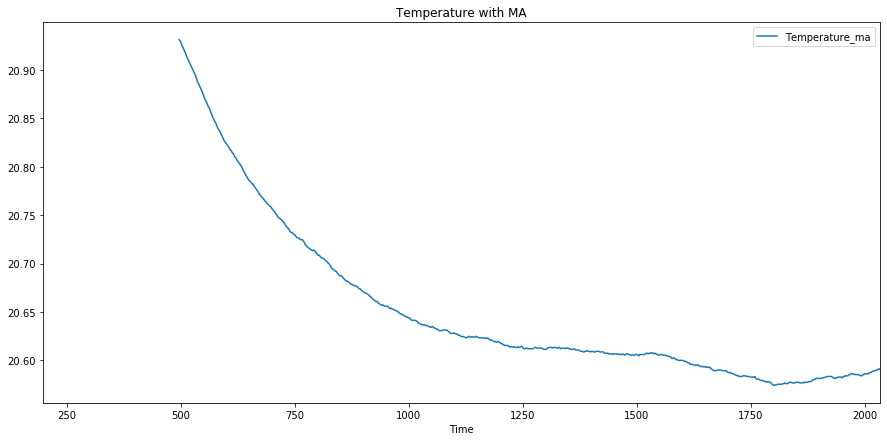

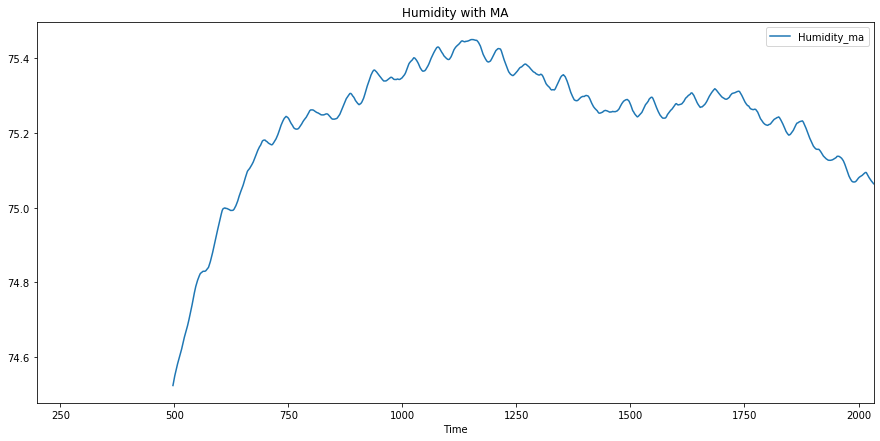

In [78]:
# New plots with Moving Average set to window=1000

df.plot(x=1, y=4,figsize=(15,7), title='Temperature with MA')
df.plot(x=1, y=5,figsize=(15,7), title='Humidity with MA')

plt.show()

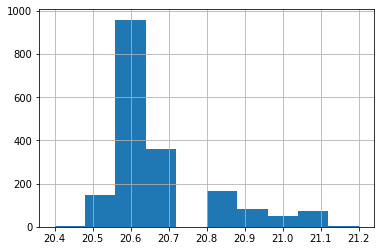

mean1=20.754248, mean2=20.594553
variance1=0.024225, variance2=0.002606


In [84]:
df['Temperature'].hist()
plt.show()

X = df['Temperature'].values
split = round(len(X)/2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

In [85]:
X = df['Temperature'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.849212
p-value: 0.002442
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


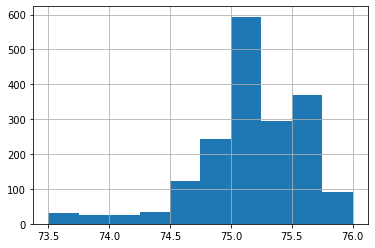

mean1=75.071895, mean2=75.215686
variance1=0.304984, variance2=0.085767


In [83]:
df['Humidity'].hist()
plt.show()

X = df['Humidity'].values
split = round(len(X)/2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

In [86]:
X = df['Humidity'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.095918
p-value: 0.000014
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
